<a href="https://colab.research.google.com/github/eoinleen/Biophysics-general/blob/main/Dianthus_ratio_fitting_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔬 Dianthus Binding Analysis Tool (Bidirectional Signal)
📁 Upload your Excel file with:
   • Column A: Concentration in nM
   • Column B: Ratio values (can increase or decrease)


Saving Triaged_expt_150447_minimal_set.xlsx to Triaged_expt_150447_minimal_set (1).xlsx
✅ File 'Triaged_expt_150447_minimal_set (1).xlsx' uploaded successfully!
📊 File structure preview:
   Rows: 21
   Columns: [15129.333333333332, 0.9735860447339066]

📋 First few rows:
   15129.333333  0.973586    
0   5043.111111      1.016241
1   1681.037037      1.061767
2    560.345679      1.086621
3    186.781893      1.100743
4     62.260631      1.112849

🔍 Found 1 column pairs:
   Pair 0: 15129.333333333332 (conc nM) & 0.9735860447339066 (ratio)

⚙️ Analysis plan:
   Pairs to fit: [0]
   Pairs to plot as scatter: []

📈 Pair 0 data summary:
   Data points: 21
   Concentration range: 0.0 - 45388.0 nM
   Ratio range: 0.939 - 1.121

🔄 Fitting 1 pairs...

--- Analyzing Pair 0 ---
   Signal direction: Decreases with concentration

📊 Model comparison:
   Hill equation: R² = 0.8065
   One site + non-specific: R² = 0.7968
   One site (decrease): R² = 0.7961
   Best model: Hill equation
✅ Pair 0 - Kd: 

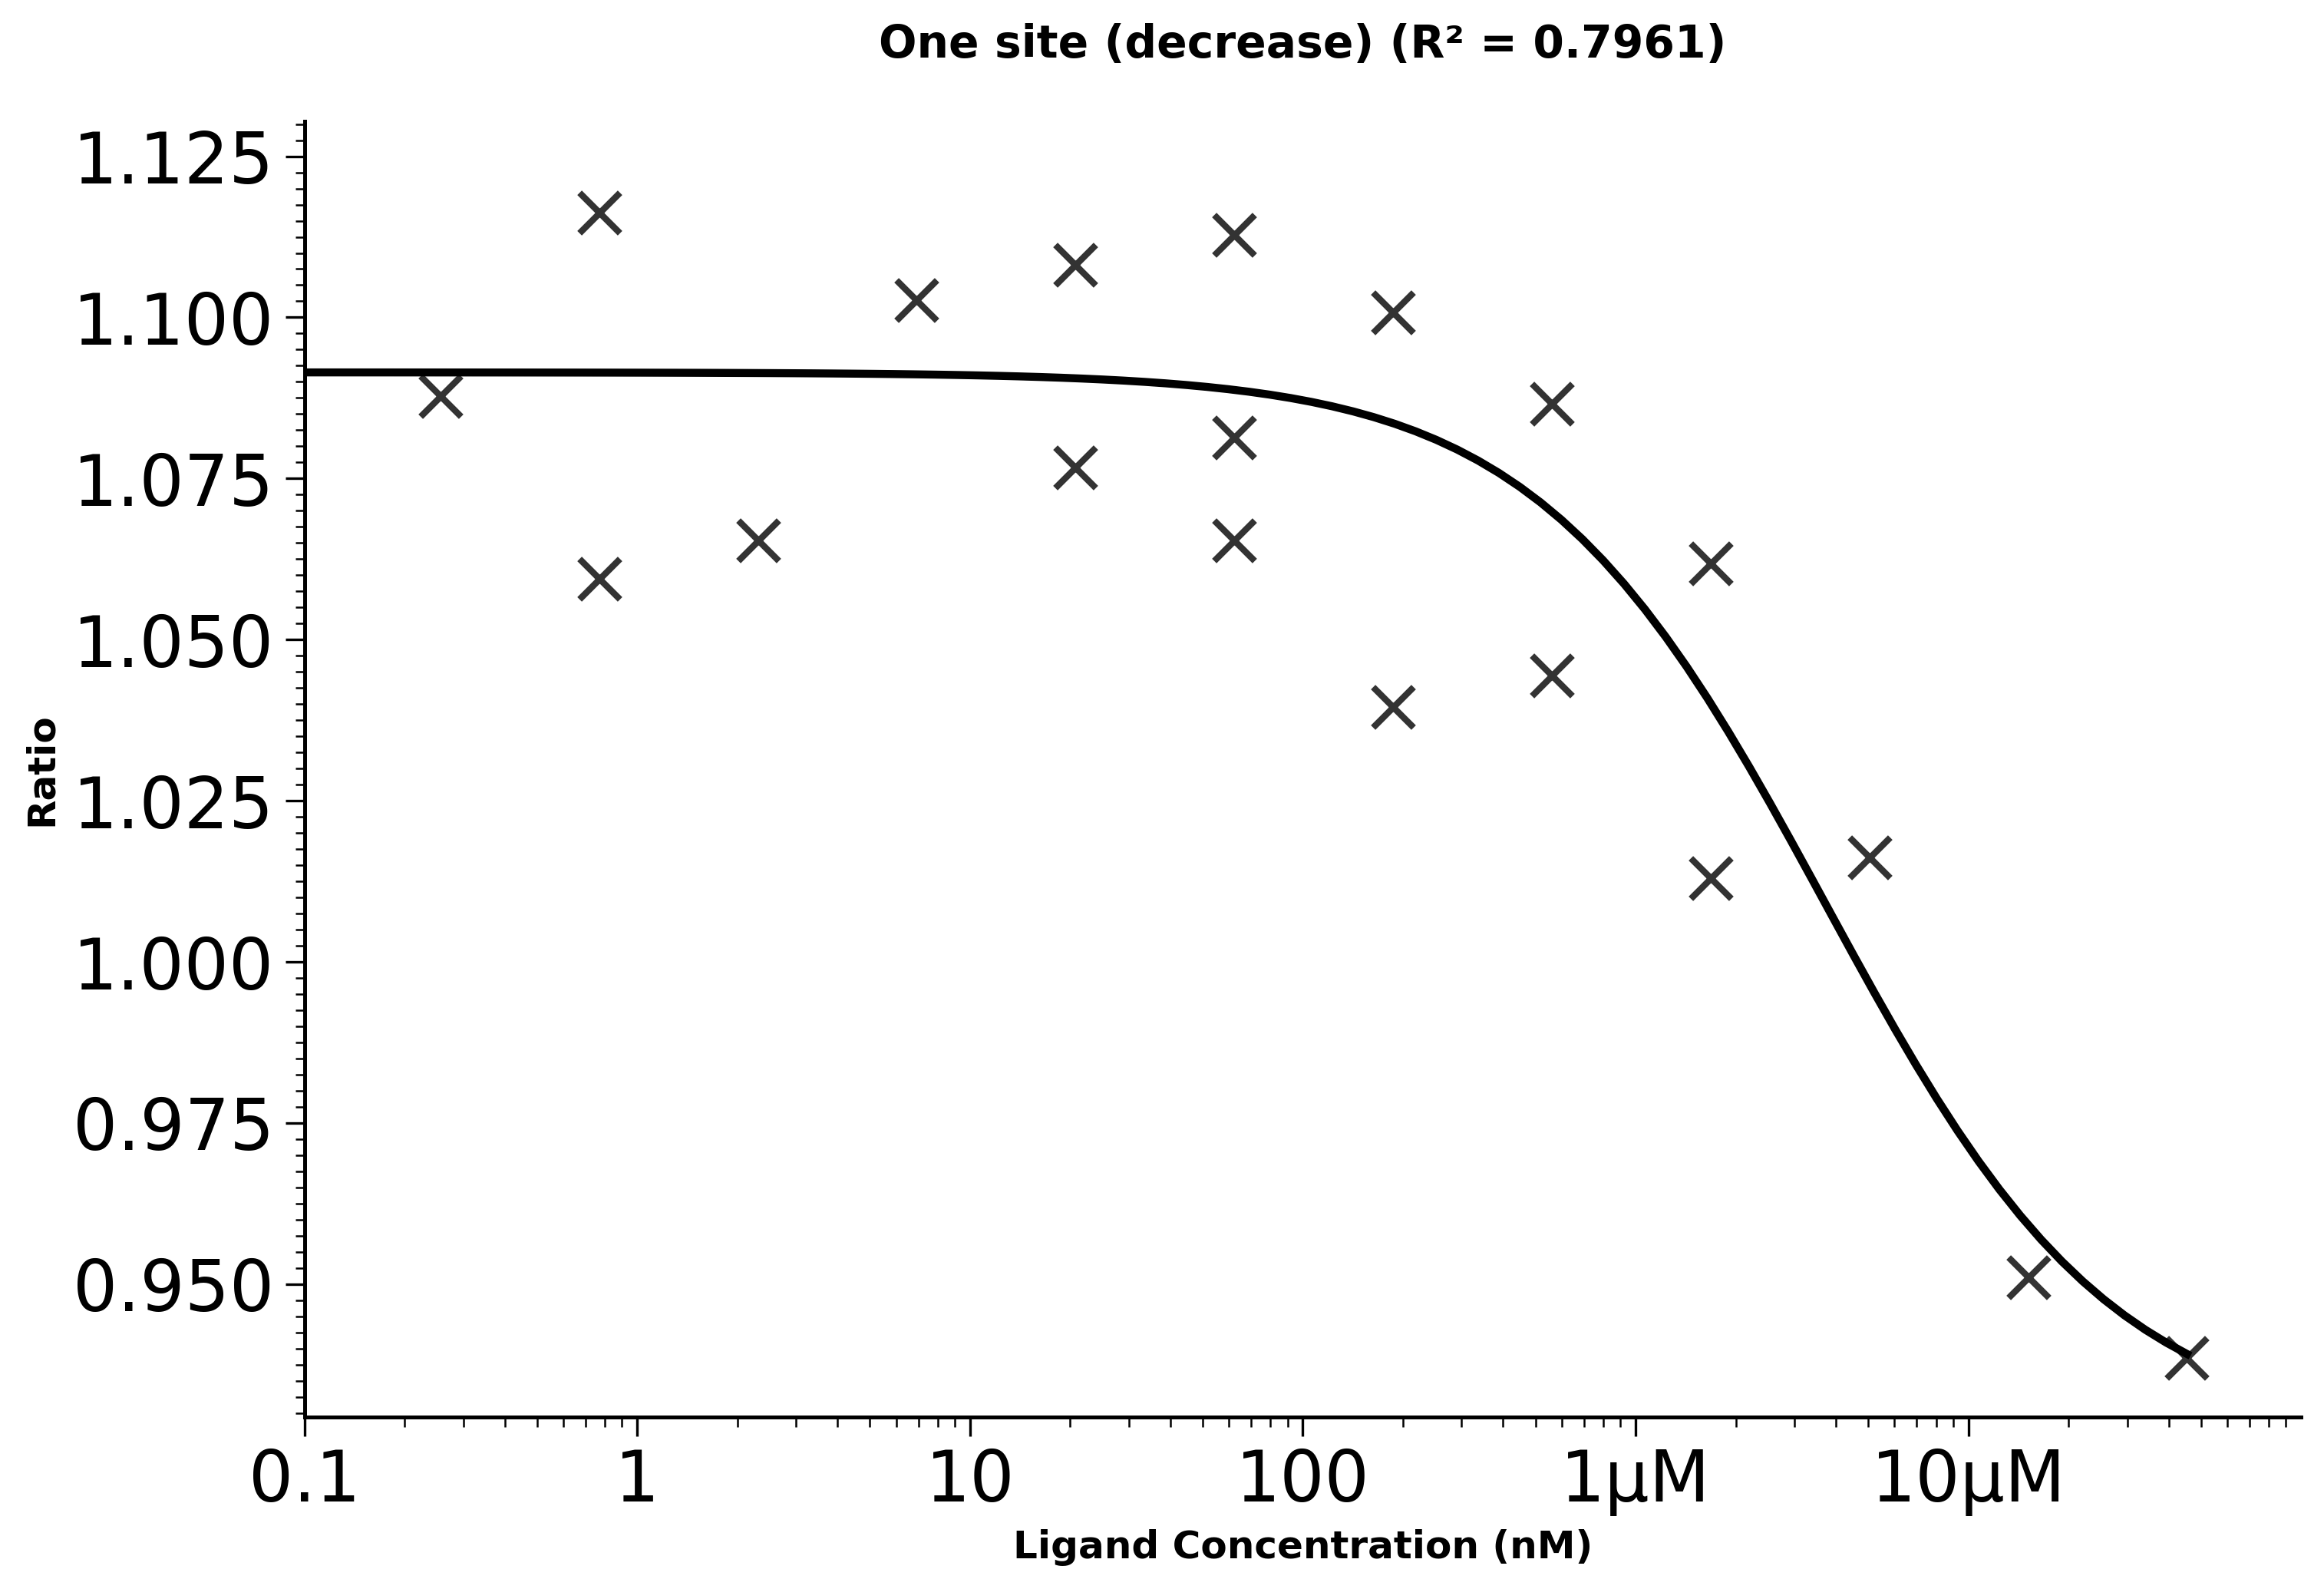


📊 One site (decrease):
   Equation: Y = Top - (Top-Bottom)*X/(Kd+X)
   R²: 0.7961
   Kd: 3.714e-06 M (3714.1 nM)
   Standard Error: ± 1.985e-06 M (± 1985.2 nM)
   90% CI: (448.4 - 6979.7 nM)
   🚨 95% CI: <detection limit - 7605.0 nM (lower bound negative)
       Report as: Kd = 3714 nM (95% CI: below detection limit to 7605 nM)
   Relative error: 53.5% 🚨 (POOR)
--------------------------------------------------
✅ Saved: Dianthus_binding_One_site_plus_non-specific_pair0.png


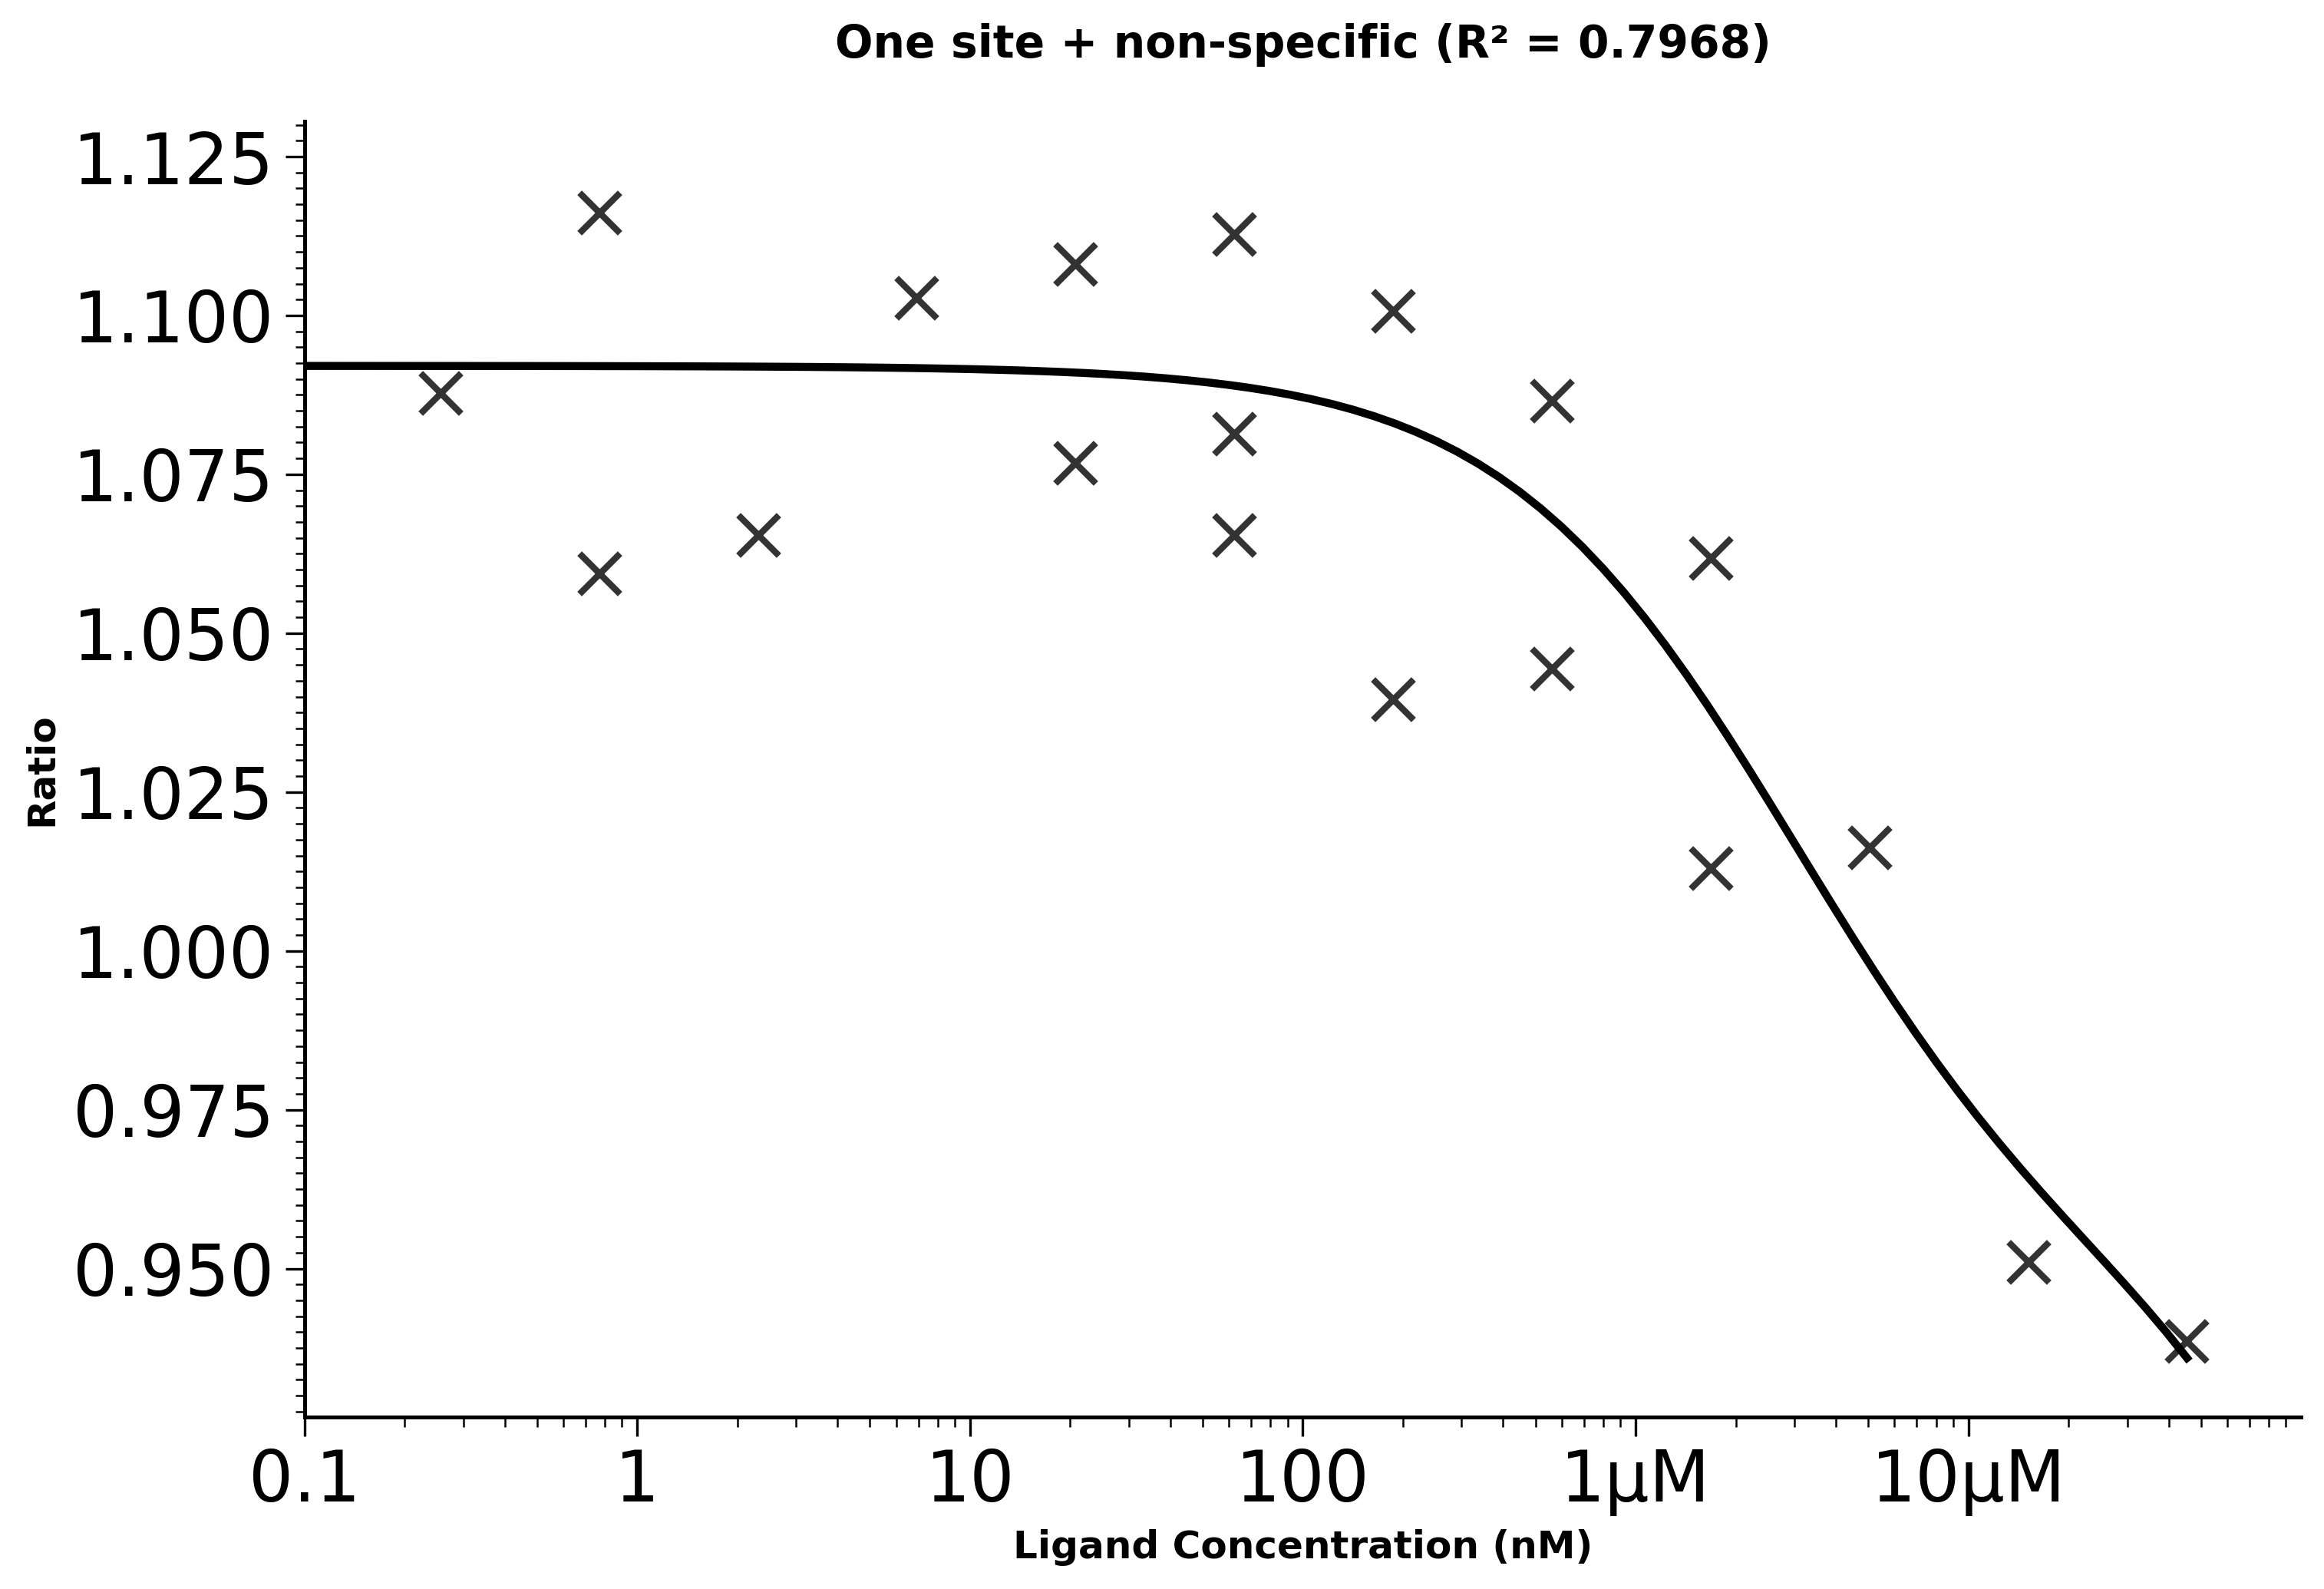


📊 One site + non-specific:
   Equation: Y = Bottom + (Top-Bottom)*X/(Kd+X) + NS*X
   R²: 0.7968
   Kd: 2.825e-06 M (2824.8 nM)
   Standard Error: ± 2.705e-06 M (± 2704.8 nM)
   ⚠️  90% CI: <detection limit - 7274.2 nM (lower bound negative)
   🚨 95% CI: <detection limit - 8126.2 nM (lower bound negative)
       Report as: Kd = 2825 nM (95% CI: below detection limit to 8126 nM)
   Relative error: 95.8% 🚨 (POOR)
--------------------------------------------------
✅ Saved: Dianthus_binding_Hill_equation_pair0.png


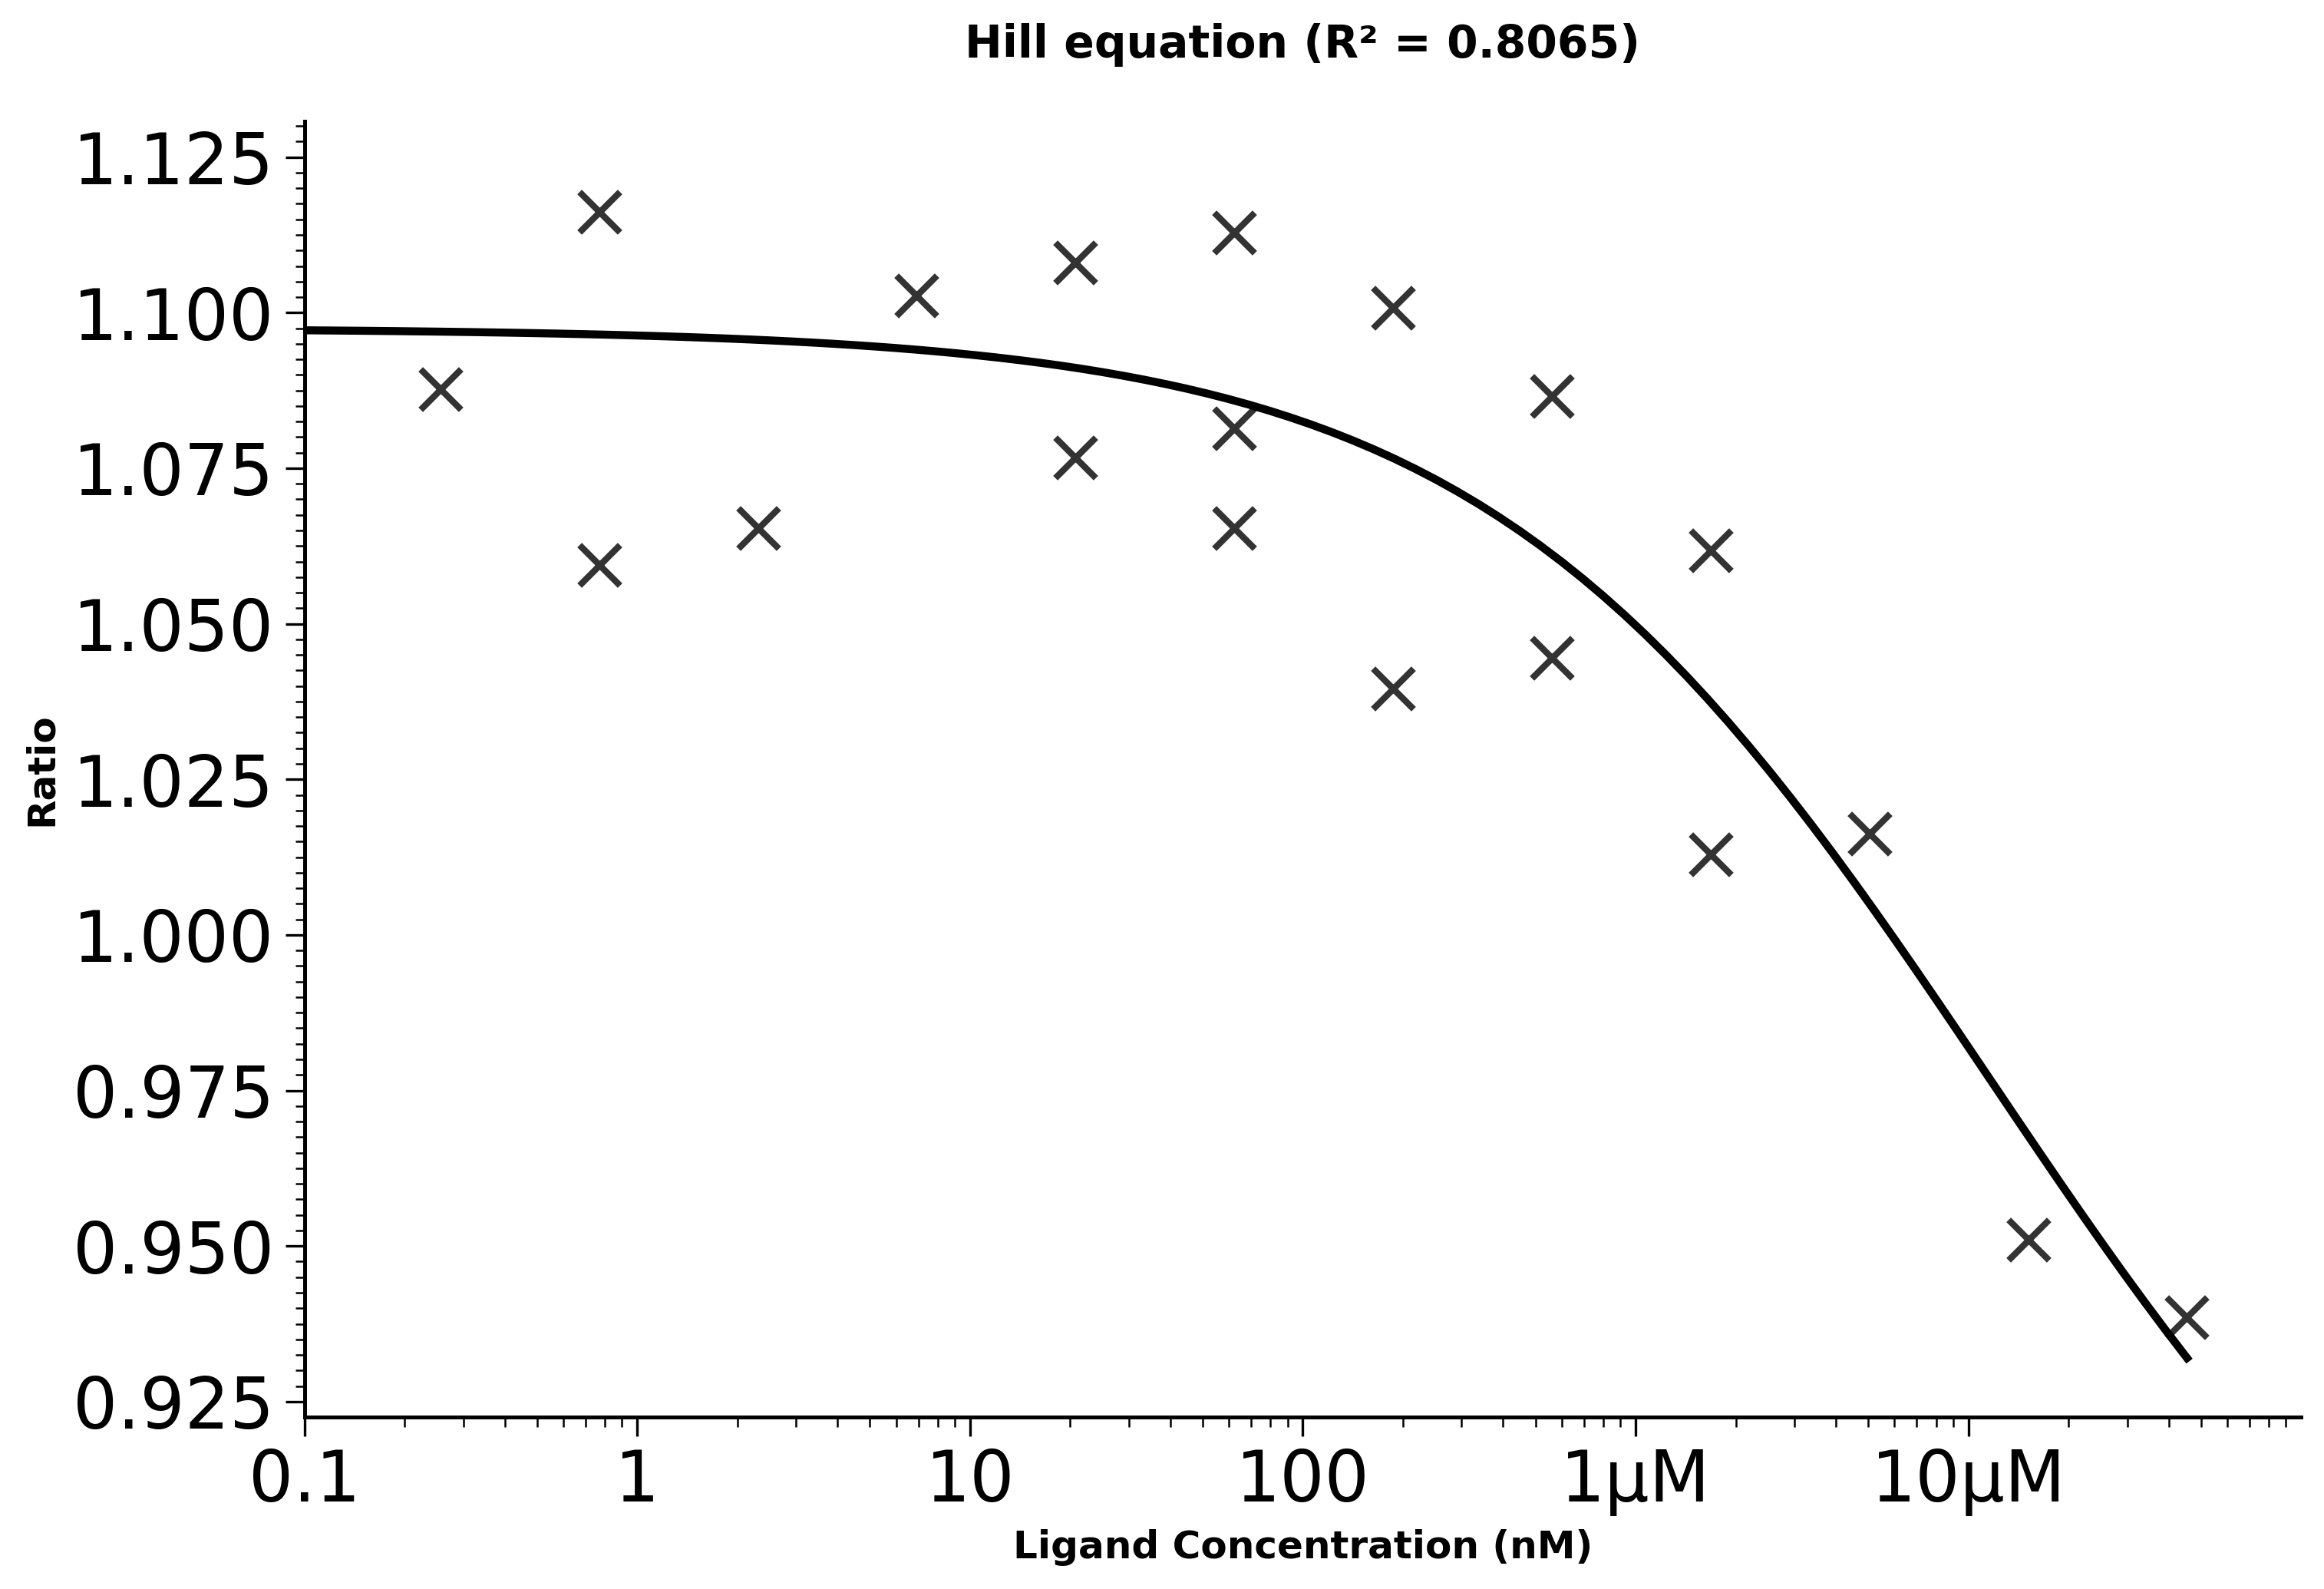


📊 Hill equation:
   Equation: Y = Bottom + (Top-Bottom)/(1+(Kd/X)^n)
   R²: 0.8065
   Kd: 1.168e-05 M (11682.3 nM)
   Standard Error: ± 3.184e-05 M (± 31838.0 nM)
   ⚠️  90% CI: <detection limit - 64055.9 nM (lower bound negative)
   🚨 95% CI: <detection limit - 74084.9 nM (lower bound negative)
       Report as: Kd = 11682 nM (95% CI: below detection limit to 74085 nM)
   Relative error: 272.5% 🚨 (POOR)
--------------------------------------------------

💾 All model plots saved for Dianthus binding analysis.


In [ ]:
"""
Dianthus Binding Assay Analysis Script (Bidirectional Signal)
=============================================================

Author: Claude (Anthropic)
Version: 2.0
Date: 2025

OVERVIEW:
This script analyzes Dianthus binding assay data where the signal can either increase
or decrease upon ligand binding. Unlike TRIC assays, this modality allows for both
positive and negative signal changes depending on the binding mechanism.

INPUT DATA FORMAT:
- Excel files with paired columns: (A,B), (C,D), (E,F), etc.
- Column pattern: Concentration (nM), Ratio values
- Ratio can increase or decrease from baseline upon binding

MATHEMATICAL MODELS AND FITTING ALGORITHM:
================================================================================

BINDING MODELS TESTED:
1. ONE SITE BINDING (Increase):
   Y = Bottom + (Top - Bottom) × X/(Kd + X)
   For signals that increase with binding concentration

2. ONE SITE BINDING (Decrease):
   Y = Top - (Top - Bottom) × X/(Kd + X)
   For signals that decrease with binding concentration

3. ONE SITE BINDING WITH NON-SPECIFIC:
   Y = Bottom + (Top - Bottom) × X/(Kd + X) + NS × X
   Includes linear non-specific component

4. HILL EQUATION (Bidirectional):
   Y = Bottom + (Top - Bottom) / (1 + (Kd/X)^n)
   Can handle both increases and decreases with Hill coefficient

FITTING ALGORITHM DETAILS:
================================================================================
Algorithm: Levenberg-Marquardt (LM) non-linear least squares optimization
Implementation: SciPy curve_fit function

The Levenberg-Marquardt algorithm combines:
- Gauss-Newton method: Fast convergence near the solution
- Gradient descent: Stable convergence far from solution
- Adaptive damping parameter (λ) that adjusts during iteration

Optimization Process:
1. Initial parameter estimates generated from data characteristics
2. Iterative parameter adjustment to minimize sum of squared residuals
3. Parameter bounds enforced to ensure physically meaningful results
4. Maximum 5000 iterations allowed for convergence
5. Covariance matrix calculated from Jacobian at convergence

ERROR ANALYSIS AND STATISTICS:
================================================================================
Parameter Standard Errors:
- Calculated as √(diagonal elements of covariance matrix)
- Assumes normal distribution of parameter estimates
- Valid for well-conditioned fitting problems

Confidence Intervals:
- 90% CI: parameter ± 1.645 × standard_error
- 95% CI: parameter ± 1.96 × standard_error
- Based on t-distribution approximation for large sample sizes

Model Quality Assessment:
- R² (coefficient of determination) = 1 - (SS_residual / SS_total)
- Values closer to 1 indicate better model fit
- Best model selected based on highest R²

LIMITATIONS AND WARNINGS:
================================================================================
- Negative confidence interval bounds indicate poor parameter identifiability
- High relative errors (>30%) suggest insufficient data quality or range
- Parameter correlation can lead to unreliable individual parameter estimates
- Assumes homoscedastic (constant variance) residuals
- Large confidence intervals may require log-normal distribution assumptions

RECOMMENDED DATA QUALITY CRITERIA:
- Signal change >20% for reliable fitting
- Concentration range spanning 0.1× to 10× the expected Kd
- Clear baseline and saturation plateaus
- Signal-to-noise ratio >3:1
- Minimum 8-10 data points across the binding curve

================================================================================
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import seaborn as sns
from google.colab import files
import warnings

# Set minimalist plotting style with Helvetica font
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'Arial', 'DejaVu Sans'],
    'axes.linewidth': 1.2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'xtick.major.size': 6,
    'ytick.major.size': 6,
    'axes.grid': False,
    'figure.facecolor': 'none',
    'axes.facecolor': 'none'
})

def analyze_uploaded_file_multi(filename, pairs_to_fit=None, pairs_to_plot=None):
    """
    Load and analyze multiple column pairs from Excel file
    """
    try:
        # Read Excel file
        df = pd.read_excel(filename, engine='openpyxl')

        print(f"📊 File structure preview:")
        print(f"   Rows: {len(df)}")
        print(f"   Columns: {list(df.columns)}")
        print("\n📋 First few rows:")
        print(df.head())

        # Determine number of column pairs
        n_cols = df.shape[1]
        n_pairs = n_cols // 2

        print(f"\n🔍 Found {n_pairs} column pairs:")
        for i in range(n_pairs):
            col_names = df.columns[i*2:(i+1)*2].tolist()
            print(f"   Pair {i}: {col_names[0]} (conc nM) & {col_names[1]} (ratio)")

        # Set defaults if not specified
        if pairs_to_fit is None and pairs_to_plot is None:
            pairs_to_fit = [0]
            pairs_to_plot = list(range(1, n_pairs))
        elif pairs_to_fit is None:
            pairs_to_fit = []
        elif pairs_to_plot is None:
            pairs_to_plot = []

        print(f"\n⚙️ Analysis plan:")
        print(f"   Pairs to fit: {pairs_to_fit}")
        print(f"   Pairs to plot as scatter: {pairs_to_plot}")

        # Extract and analyze data
        all_data = {}
        fit_results = {}

        for pair_idx in range(n_pairs):
            conc_col = pair_idx * 2
            ratio_col = pair_idx * 2 + 1

            concentrations_nm = df.iloc[:, conc_col].dropna().values
            ratios = df.iloc[:, ratio_col].dropna().values

            # Match lengths
            min_len = min(len(concentrations_nm), len(ratios))
            concentrations_nm = concentrations_nm[:min_len]
            ratios = ratios[:min_len]

            # Convert to M for calculations (but keep nM for display)
            concentrations_m = concentrations_nm * 1e-9

            all_data[pair_idx] = {
                'conc_nm': concentrations_nm,
                'conc_m': concentrations_m,
                'ratios': ratios,
                'name': f"Pair {pair_idx}"
            }

            print(f"\n📈 Pair {pair_idx} data summary:")
            print(f"   Data points: {len(concentrations_m)}")
            print(f"   Concentration range: {np.min(concentrations_nm):.1f} - {np.max(concentrations_nm):.1f} nM")
            print(f"   Ratio range: {np.min(ratios):.3f} - {np.max(ratios):.3f}")

        # Fit specified pairs
        if pairs_to_fit:
            print(f"\n🔄 Fitting {len(pairs_to_fit)} pairs...")
            for pair_idx in pairs_to_fit:
                if pair_idx < n_pairs:
                    print(f"\n--- Analyzing Pair {pair_idx} ---")
                    result = analyze_binding_data(all_data[pair_idx]['conc_m'],
                                                all_data[pair_idx]['ratios'])
                    if result:
                        fit_results[pair_idx] = result
                        kd_nm = result['parameters'][result['kd_index']] * 1e9
                        print(f"✅ Pair {pair_idx} - Kd: {kd_nm:.1f} nM, R²: {result['r2']:.3f}")

                        # Show confidence intervals with error checking
                        show_confidence_intervals_with_warnings(result, pair_idx)

        # Create combined plot
        plot_all_models(all_data, fit_results, pairs_to_fit, pairs_to_plot)

        return all_data, fit_results

    except Exception as e:
        print(f"❌ Error loading file '{filename}': {e}")
        return None, None

def one_site_binding_increase(x, bottom, top, kd):
    """One site binding with signal increase"""
    return bottom + (top - bottom) * x / (kd + x)

def one_site_binding_decrease(x, top, bottom, kd):
    """One site binding with signal decrease"""
    return top - (top - bottom) * x / (kd + x)

def one_site_binding_ns(x, bottom, top, kd, ns):
    """One site binding with non-specific component"""
    return bottom + (top - bottom) * x / (kd + x) + ns * x

def hill_equation_bidirectional(x, bottom, top, kd, hill_coeff):
    """Hill equation that can handle increases or decreases"""
    return bottom + (top - bottom) / (1 + (kd / x) ** hill_coeff)

def analyze_binding_data(concentrations, ratios):
    """Fit binding data with bidirectional signal capability"""
    # Sort data
    sort_idx = np.argsort(concentrations)
    conc_sorted = concentrations[sort_idx]
    ratio_sorted = ratios[sort_idx]

    # Determine signal direction
    min_ratio = np.min(ratio_sorted)
    max_ratio = np.max(ratio_sorted)
    first_point = ratio_sorted[0]  # Lowest concentration
    last_point = ratio_sorted[-1]  # Highest concentration

    # Determine if signal increases or decreases with concentration
    signal_increases = last_point > first_point

    print(f"   Signal direction: {'Increases' if signal_increases else 'Decreases'} with concentration")

    models_to_test = []

    try:
        # Model 1: One site binding (increase)
        if signal_increases:
            try:
                initial_guess = [min_ratio, max_ratio, np.median(conc_sorted)]
                popt_1, pcov_1 = curve_fit(one_site_binding_increase, conc_sorted, ratio_sorted,
                                         p0=initial_guess, maxfev=5000,
                                         bounds=([0, 0, 1e-12], [np.inf, np.inf, np.inf]))
                fitted_1 = one_site_binding_increase(conc_sorted, *popt_1)
                r2_1 = r2_score(ratio_sorted, fitted_1)
                models_to_test.append({
                    'name': 'One site (increase)',
                    'equation': 'Y = Bottom + (Top-Bottom)*X/(Kd+X)',
                    'params': popt_1,
                    'param_names': ['Bottom', 'Top', 'Kd (M)'],
                    'pcov': pcov_1,
                    'r2': r2_1,
                    'fitted': fitted_1,
                    'function': one_site_binding_increase,
                    'kd_index': 2
                })
            except:
                pass

        # Model 2: One site binding (decrease)
        if not signal_increases:
            try:
                initial_guess = [max_ratio, min_ratio, np.median(conc_sorted)]
                popt_2, pcov_2 = curve_fit(one_site_binding_decrease, conc_sorted, ratio_sorted,
                                         p0=initial_guess, maxfev=5000,
                                         bounds=([0, 0, 1e-12], [np.inf, np.inf, np.inf]))
                fitted_2 = one_site_binding_decrease(conc_sorted, *popt_2)
                r2_2 = r2_score(ratio_sorted, fitted_2)
                models_to_test.append({
                    'name': 'One site (decrease)',
                    'equation': 'Y = Top - (Top-Bottom)*X/(Kd+X)',
                    'params': popt_2,
                    'param_names': ['Top', 'Bottom', 'Kd (M)'],
                    'pcov': pcov_2,
                    'r2': r2_2,
                    'fitted': fitted_2,
                    'function': one_site_binding_decrease,
                    'kd_index': 2
                })
            except:
                pass

        # Model 3: One site with non-specific
        try:
            if signal_increases:
                initial_guess = [min_ratio, max_ratio, np.median(conc_sorted), 0.0]
                popt_3, pcov_3 = curve_fit(one_site_binding_ns, conc_sorted, ratio_sorted,
                                         p0=initial_guess, maxfev=5000)
            else:
                initial_guess = [max_ratio, min_ratio, np.median(conc_sorted), 0.0]
                popt_3, pcov_3 = curve_fit(one_site_binding_ns, conc_sorted, ratio_sorted,
                                         p0=initial_guess, maxfev=5000)

            fitted_3 = one_site_binding_ns(conc_sorted, *popt_3)
            r2_3 = r2_score(ratio_sorted, fitted_3)
            models_to_test.append({
                'name': 'One site + non-specific',
                'equation': 'Y = Bottom + (Top-Bottom)*X/(Kd+X) + NS*X',
                'params': popt_3,
                'param_names': ['Bottom', 'Top', 'Kd (M)', 'Non-specific'],
                'pcov': pcov_3,
                'r2': r2_3,
                'fitted': fitted_3,
                'function': one_site_binding_ns,
                'kd_index': 2
            })
        except:
            pass

        # Model 4: Hill equation
        try:
            if signal_increases:
                initial_guess = [min_ratio, max_ratio, np.median(conc_sorted), 1.0]
            else:
                initial_guess = [max_ratio, min_ratio, np.median(conc_sorted), 1.0]

            popt_4, pcov_4 = curve_fit(hill_equation_bidirectional, conc_sorted, ratio_sorted,
                                     p0=initial_guess, maxfev=5000,
                                     bounds=([0, 0, 1e-12, 0.1], [np.inf, np.inf, np.inf, 5.0]))
            fitted_4 = hill_equation_bidirectional(conc_sorted, *popt_4)
            r2_4 = r2_score(ratio_sorted, fitted_4)
            models_to_test.append({
                'name': 'Hill equation',
                'equation': 'Y = Bottom + (Top-Bottom)/(1+(Kd/X)^n)',
                'params': popt_4,
                'param_names': ['Bottom', 'Top', 'Kd (M)', 'Hill coefficient'],
                'pcov': pcov_4,
                'r2': r2_4,
                'fitted': fitted_4,
                'function': hill_equation_bidirectional,
                'kd_index': 2
            })
        except:
            pass

        if not models_to_test:
            print("All fitting attempts failed")
            return None

        # Select best model
        best_model = max(models_to_test, key=lambda x: x['r2'])

        # Generate smooth curve
        conc_smooth = np.logspace(np.log10(np.min(conc_sorted)),
                                  np.log10(np.max(conc_sorted)), 100)

        if best_model['name'] == 'One site (increase)':
            smooth_curve = one_site_binding_increase(conc_smooth, *best_model['params'])
        elif best_model['name'] == 'One site (decrease)':
            smooth_curve = one_site_binding_decrease(conc_smooth, *best_model['params'])
        elif best_model['name'] == 'One site + non-specific':
            smooth_curve = one_site_binding_ns(conc_smooth, *best_model['params'])
        else:
            smooth_curve = hill_equation_bidirectional(conc_smooth, *best_model['params'])

        # Print model comparison
        print(f"\n📊 Model comparison:")
        for model in sorted(models_to_test, key=lambda x: x['r2'], reverse=True):
            print(f"   {model['name']}: R² = {model['r2']:.4f}")
        print(f"   Best model: {best_model['name']}")

        return {
            'parameters': best_model['params'],
            'param_errors': np.sqrt(np.diag(best_model['pcov'])),
            'param_names': best_model['param_names'],
            'r2': best_model['r2'],
            'method': best_model['name'],
            'equation': best_model['equation'],
            'original_conc': conc_sorted,
            'original_ratios': ratio_sorted,
            'smooth_conc': conc_smooth,
            'smooth_ratios': smooth_curve,
            'all_models': models_to_test,
            'kd_index': best_model['kd_index']
        }

    except Exception as e:
        print(f"Fitting failed: {e}")
        return None

def show_confidence_intervals_with_warnings(result, pair_idx):
    """Show confidence intervals with error checking for negative values"""
    kd_idx = result['kd_index']
    kd_m = result['parameters'][kd_idx]
    kd_nm = kd_m * 1e9
    kd_error_m = result['param_errors'][kd_idx]
    kd_error_nm = kd_error_m * 1e9

    # Calculate confidence intervals
    ci_90_lower_m = kd_m - 1.645 * kd_error_m
    ci_90_upper_m = kd_m + 1.645 * kd_error_m
    ci_90_lower_nm = ci_90_lower_m * 1e9
    ci_90_upper_nm = ci_90_upper_m * 1e9

    ci_95_lower_m = kd_m - 1.96 * kd_error_m
    ci_95_upper_m = kd_m + 1.96 * kd_error_m
    ci_95_lower_nm = ci_95_lower_m * 1e9
    ci_95_upper_nm = ci_95_upper_m * 1e9

    print(f"   Standard Error: ± {kd_error_m:.3e} M (± {kd_error_nm:.1f} nM)")

    # Check for negative confidence intervals and issue warnings
    warning_issued = False

    if ci_90_lower_nm < 0:
        print(f"   ⚠️  WARNING: 90% CI lower bound is negative ({ci_90_lower_nm:.1f} nM)")
        print(f"       90% CI: <detection limit - {ci_90_upper_nm:.1f} nM")
        warning_issued = True
    else:
        print(f"   90% CI: {ci_90_lower_nm:.1f} - {ci_90_upper_nm:.1f} nM")

    if ci_95_lower_nm < 0:
        print(f"   🚨 WARNING: 95% CI lower bound is negative ({ci_95_lower_nm:.1f} nM)")
        print(f"       95% CI: <detection limit - {ci_95_upper_nm:.1f} nM")
        warning_issued = True
    else:
        print(f"   95% CI: {ci_95_lower_nm:.1f} - {ci_95_upper_nm:.1f} nM")

    if warning_issued:
        print(f"   🔍 INTERPRETATION: Negative CI bounds indicate poor parameter")
        print(f"       identifiability. Consider:")
        print(f"       • Extending concentration range")
        print(f"       • Improving signal-to-noise ratio")
        print(f"       • Collecting more data points")
        print(f"       • Using log-normal CI assumptions")

    # pKd with confidence intervals
    pkd = -np.log10(kd_m)
    if ci_90_upper_nm > 0:
        pkd_ci_90_lower = -np.log10(ci_90_upper_m) if ci_90_upper_m > 0 else np.nan
        pkd_ci_90_upper = -np.log10(max(ci_90_lower_m, 1e-12))  # Prevent log of negative
        print(f"   pKd: {pkd:.2f} (90% CI: {pkd_ci_90_lower:.2f} - {pkd_ci_90_upper:.2f})")

    # Relative error with quality assessment
    relative_error = (kd_error_m / kd_m) * 100
    print(f"   Relative error: {relative_error:.1f}%", end="")

    if relative_error > 50:
        print(" 🚨 (POOR - >50%)")
    elif relative_error > 30:
        print(" ⚠️  (MODERATE - >30%)")
    elif relative_error > 15:
        print(" ✓ (ACCEPTABLE - >15%)")
    else:
        print(" ✅ (GOOD - <15%)")

def plot_all_models(all_data, fit_results, pairs_to_fit, pairs_to_plot):
    """Create separate plots for each binding model"""

    for pair_idx in pairs_to_fit:
        if pair_idx in fit_results and 'all_models' in fit_results[pair_idx]:
            result = fit_results[pair_idx]
            data = all_data[pair_idx]

            # Create separate plots for each model
            for i, model in enumerate(result['all_models']):
                fig, ax = plt.subplots(1, 1, figsize=(10, 7), dpi=300)
                fig.patch.set_alpha(0)
                ax.patch.set_alpha(0)

                # Plot data points
                ax.scatter(data['conc_nm'], data['ratios'],
                          alpha=0.8, s=160, color='black',
                          marker='x', linewidths=2, zorder=5)

                # Generate smooth curve for this model
                conc_smooth = np.logspace(np.log10(np.min(data['conc_nm'])),
                                         np.log10(np.max(data['conc_nm'])), 100)
                conc_smooth_m = conc_smooth * 1e-9

                if model['name'] == 'One site (increase)':
                    smooth_curve = one_site_binding_increase(conc_smooth_m, *model['params'])
                elif model['name'] == 'One site (decrease)':
                    smooth_curve = one_site_binding_decrease(conc_smooth_m, *model['params'])
                elif model['name'] == 'One site + non-specific':
                    smooth_curve = one_site_binding_ns(conc_smooth_m, *model['params'])
                else:
                    smooth_curve = hill_equation_bidirectional(conc_smooth_m, *model['params'])

                # Plot fitted curve
                ax.plot(conc_smooth, smooth_curve,
                       color='black', linewidth=2.5, zorder=3)

                # Plot scatter-only pairs if any
                for scatter_pair_idx in pairs_to_plot:
                    if scatter_pair_idx in all_data:
                        scatter_data = all_data[scatter_pair_idx]
                        ax.scatter(scatter_data['conc_nm'], scatter_data['ratios'],
                                  alpha=0.8, s=120, facecolors='none', edgecolors='red',
                                  marker='o', linewidths=1.5, zorder=5)

                # Styling
                ax.set_xscale('log')
                ax.set_xlabel('Ligand Concentration (nM)', fontsize=12, fontweight='bold')
                ax.set_ylabel('Ratio', fontsize=12, fontweight='bold')
                ax.tick_params(labelsize=22, which='major', direction='out', length=6)
                ax.tick_params(which='minor', direction='out', length=3)

                # Add minor ticks
                from matplotlib.ticker import AutoMinorLocator
                ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))

                # X-axis formatting for nM scale
                ax.set_xticks([0.1, 1, 10, 100, 1000, 10000])
                ax.set_xlim(0.1, 100000)  # Extended range for nM

                from matplotlib.ticker import FuncFormatter
                def format_func_nm(x, pos):
                    if x >= 1000:
                        return f'{x/1000:g}µM'
                    else:
                        return f'{x:g}'
                ax.xaxis.set_major_formatter(FuncFormatter(format_func_nm))

                # Add title
                title = f"{model['name']} (R² = {model['r2']:.4f})"
                ax.set_title(title, fontsize=14, fontweight='bold', pad=20)

                plt.tight_layout()

                # Save files
                model_name_clean = model['name'].replace(' ', '_').replace('(', '').replace(')', '').replace('+', 'plus')
                filename = f'Dianthus_binding_{model_name_clean}_pair{pair_idx}'

                try:
                    plt.savefig(f'{filename}.png', dpi=300, bbox_inches='tight',
                               transparent=True, facecolor='none')
                    print(f"✅ Saved: {filename}.png")
                except Exception as e:
                    print(f"⚠️ PNG save failed: {e}")

                plt.show()

                # Print detailed results with confidence intervals and warnings
                print(f"\n📊 {model['name']}:")
                print(f"   Equation: {model['equation']}")
                print(f"   R²: {model['r2']:.4f}")

                # Show Kd with confidence intervals and error checking
                kd_idx = model.get('kd_index', 2)
                if kd_idx < len(model['params']):
                    kd_m = model['params'][kd_idx]
                    kd_nm = kd_m * 1e9
                    param_error = np.sqrt(np.diag(model['pcov']))[kd_idx]
                    kd_error_nm = param_error * 1e9

                    # Confidence intervals with error checking
                    ci_90_lower_nm = (kd_m - 1.645 * param_error) * 1e9
                    ci_90_upper_nm = (kd_m + 1.645 * param_error) * 1e9
                    ci_95_lower_nm = (kd_m - 1.96 * param_error) * 1e9
                    ci_95_upper_nm = (kd_m + 1.96 * param_error) * 1e9

                    print(f"   Kd: {kd_m:.3e} M ({kd_nm:.1f} nM)")
                    print(f"   Standard Error: ± {param_error:.3e} M (± {kd_error_nm:.1f} nM)")

                    # Check for negative CIs and warn
                    if ci_90_lower_nm < 0:
                        print(f"   ⚠️  90% CI: <detection limit - {ci_90_upper_nm:.1f} nM (lower bound negative)")
                    else:
                        print(f"   90% CI: ({ci_90_lower_nm:.1f} - {ci_90_upper_nm:.1f} nM)")

                    if ci_95_lower_nm < 0:
                        print(f"   🚨 95% CI: <detection limit - {ci_95_upper_nm:.1f} nM (lower bound negative)")
                        print(f"       Report as: Kd = {kd_nm:.0f} nM (95% CI: below detection limit to {ci_95_upper_nm:.0f} nM)")
                    else:
                        print(f"   95% CI: ({ci_95_lower_nm:.1f} - {ci_95_upper_nm:.1f} nM)")

                    relative_error = (param_error / kd_m) * 100
                    print(f"   Relative error: {relative_error:.1f}%", end="")

                    if relative_error > 50:
                        print(" 🚨 (POOR)")
                    elif relative_error > 30:
                        print(" ⚠️  (MODERATE)")
                    else:
                        print(" ✅ (ACCEPTABLE)")

                print("-" * 50)

    print(f"\n💾 All model plots saved for Dianthus binding analysis.")

# Main execution
print("🔬 Dianthus Binding Analysis Tool (Bidirectional Signal)")
print("=" * 60)
print("📁 Upload your Excel file with:")
print("   • Column A: Concentration in nM")
print("   • Column B: Ratio values (can increase or decrease)")
print("=" * 60)

# Auto-start
uploaded = files.upload()

if uploaded:
    filename = list(uploaded.keys())[0]
    print(f"✅ File '{filename}' uploaded successfully!")

    # Auto-analyze
    data, results = analyze_uploaded_file_multi(filename)
else:
    print("❌ No file uploaded.")
    print("💡 Manual usage: data, results = analyze_uploaded_file_multi('filename.xlsx')")